In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading in the csv file as a dataframe and naming it 'df' as well as making a copy of the original dataframe
df = pd.read_csv('netflix_titles.csv')
original = df.copy()

# Previewing the first 5 rows of the dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Displaying the info for the dataframe which shows the shape (8807x12), the column names, the non-null value counts, and the data types
df.info()

# The 'director', 'cast', and 'country' variables contain many null values
# There's only one variable with a numerical data type ('release_year')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Showing descriptive statistics for the numerical columns, which in this case is just the release year
df.describe().round(1)

# Data from 1925-2021, with the median year being 2017

,release_year
count,8807.0
mean,2014.2
std,8.8
min,1925.0
25%,2013.0
50%,2017.0
75%,2019.0
max,2021.0


In [ ]:
# Dropping the variables 'director' and 'cast' due to them not being a focus for my analysis, as well as ensuring more rows are preserved in the next step
df = df.drop(columns = ['director', 'cast'])

# Dropping all rows that contain null values as well as dropping any potential duplicate rows
df = df.dropna()
df = df.drop_duplicates()

# Printing the updated info after nulls and duplicates are accounted for
df.info()

# Dropping nulls/duplicates resulted in losing about 850 observations 

<class 'pandas.core.frame.DataFrame'>
Index: 7961 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7961 non-null   object
 1   type          7961 non-null   object
 2   title         7961 non-null   object
 3   country       7961 non-null   object
 4   date_added    7961 non-null   object
 5   release_year  7961 non-null   int64 
 6   rating        7961 non-null   object
 7   duration      7961 non-null   object
 8   listed_in     7961 non-null   object
 9   description   7961 non-null   object
dtypes: int64(1), object(9)
memory usage: 684.1+ KB


In [ ]:
# Printing the updated descriptive statistics after nulls and duplicates are accounted for
df.describe().round(1)

# Data now from 1942-2021, with the median year still being 2017

,release_year
count,7961.0
mean,2013.9
std,9.0
min,1942.0
25%,2013.0
50%,2017.0
75%,2019.0
max,2021.0


In [ ]:
# Displaying the value counts of each production type 
df.value_counts('type').sort_values(ascending = False).reset_index()

# Many more movie releases than TV shows

,type,count
0,Movie,5687
1,TV Show,2274


In [ ]:
# Listing the value counts of each type of rating 
df.value_counts('rating').sort_values(ascending = False).reset_index()

# The majority of productions seem to be intended for more mature audiences

,rating,count
0,TV-MA,2929
1,TV-14,1927
2,R,788
3,TV-PG,771
4,PG-13,482
5,PG,281
6,TV-Y7,235
7,TV-Y,227
8,TV-G,190
9,NR,79


In [ ]:
# Grouping by 'country' and outputting the top 10 countries for total production releases 
prods_by_country = df.groupby('country')['show_id'].count().rename('count_of_productions_released').sort_values(ascending = False).reset_index().head(10)
prods_by_country

# US, India, and UK are the top 3

,country,count_of_productions_released
0,United States,2809
1,India,972
2,United Kingdom,418
3,Japan,243
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


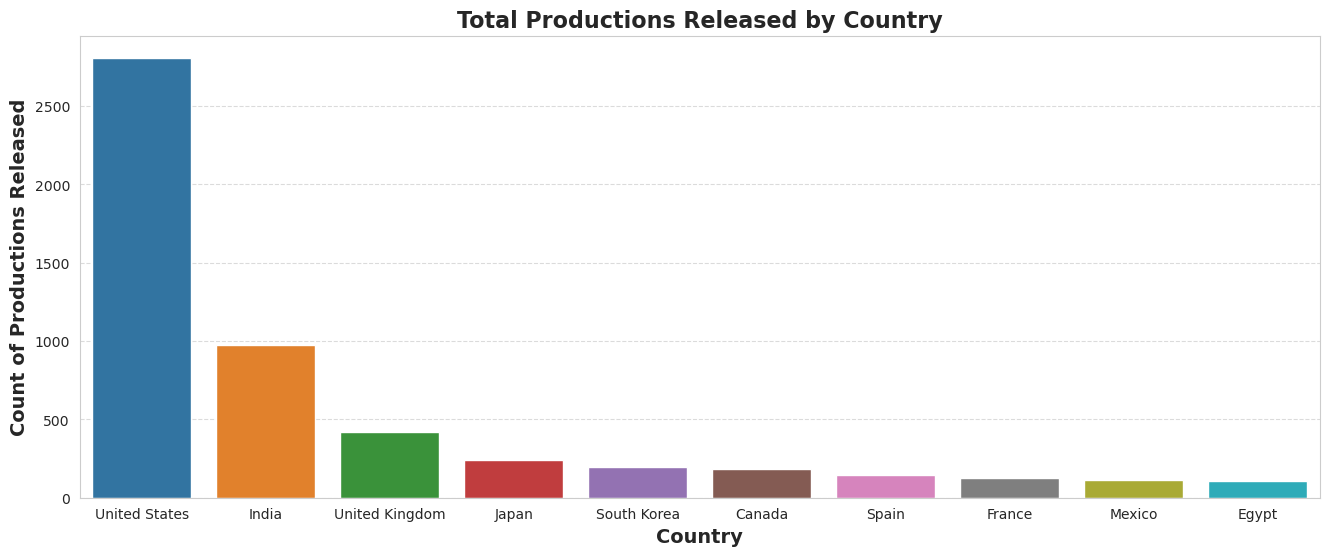

In [ ]:
# Plotting the results from the cell above
plt.figure(figsize = (16, 6))

sns.barplot(x = 'country', y = 'count_of_productions_released', data = prods_by_country, hue = 'country')
plt.xlabel('Country', fontsize = 14, weight = 'bold')
plt.ylabel('Count of Productions Released', fontsize = 14, weight = 'bold')
plt.title('Total Productions Released by Country', fontsize = 16, weight = 'bold')
plt.grid(axis = 'y', linestyle = '--', alpha = .7)
plt.show()

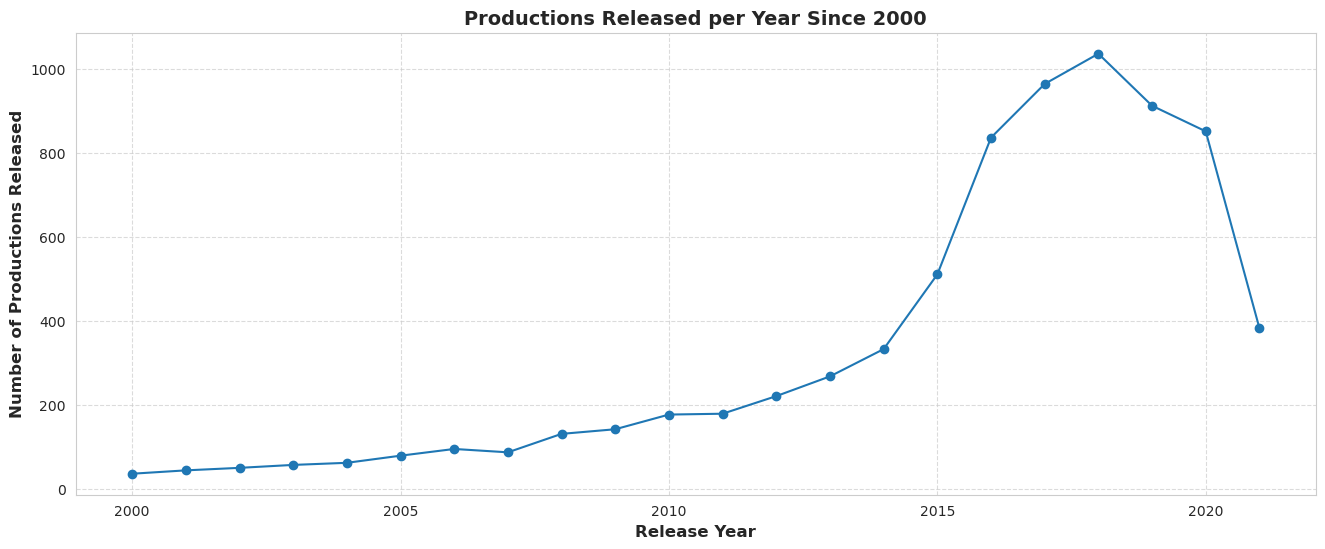

In [ ]:
# Grouping by 'release_year' and getting the count of productions released for each year
productions_by_year = df.groupby('release_year')['show_id'].count().rename('count_of_productions_released').reset_index().sort_values(
    by = 'release_year', ascending = False).head(22)

# Plotting the results 
plt.figure(figsize = (16, 6))

plt.plot(productions_by_year['release_year'], productions_by_year['count_of_productions_released'], '-o')
plt.xlabel("Release Year", fontsize = 12,  weight = 'bold')
plt.ylabel("Number of Productions Released", fontsize = 12, weight = 'bold')
plt.title("Productions Released per Year Since 2000", fontsize = 14, fontweight = "bold")
plt.grid(linestyle = '--', alpha = 0.7)
plt.show()

# Assuming major drop off in 2021 could be due to COVID-19 or from not having all of the data for the entirety of the year

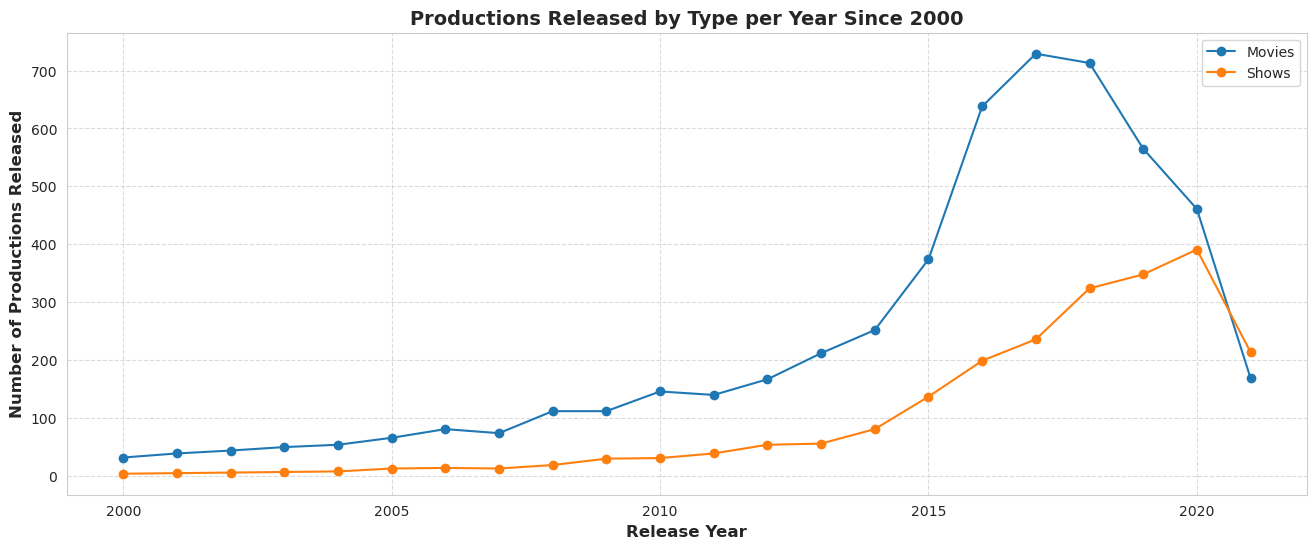

In [ ]:
# Creating dataframes that contain only movies and only tv shows since the year 2000
movies = df[(df['type'] == 'Movie') & (df['release_year'] >= 2000)].copy()
shows = df[(df['type'] == 'TV Show') & (df['release_year'] >= 2000)].copy()

# Grouping by release year and counting the number of production releases for each dataframe
movies_by_year = movies.groupby('release_year')['show_id'].count().rename('count_of_movies_released').reset_index().sort_values(
    by = 'release_year', ascending = False)
shows_by_year = shows.groupby('release_year')['show_id'].count().rename('count_of_shows_released').reset_index().sort_values(
    by = 'release_year', ascending = False)

# Plotting the results
plt.figure(figsize = (16, 6))

plt.plot(movies_by_year['release_year'], movies_by_year['count_of_movies_released'], '-o', label = 'Movies')
plt.plot(shows_by_year['release_year'], shows_by_year['count_of_shows_released'], '-o', label = 'Shows')
plt.xlabel("Release Year", fontsize = 12,  weight = 'bold')
plt.ylabel("Number of Productions Released", fontsize = 12, weight = 'bold')
plt.title("Productions Released by Type per Year Since 2000", fontsize = 14, fontweight = "bold")
plt.grid(linestyle = '--', alpha = 0.7)
plt.legend()
plt.show()

# Number of tv shows had been on a steady incline while the number of movies saw a large jump, and then a steep decrease between the years 2014-2021

In [ ]:
# Presenting the count of tv shows for each duration of seasons
shows.value_counts('duration').reset_index()

# Continual decrease in total shows as the number of seasons grow

,duration,count
0,1 Season,1432
1,2 Seasons,379
2,3 Seasons,186
3,4 Seasons,89
4,5 Seasons,60
5,6 Seasons,31
6,7 Seasons,19
7,8 Seasons,15
8,9 Seasons,7
9,10 Seasons,4


In [ ]:
# Changing the data type of the 'duration' variable in the movies dataframe from an object to an integer
movies['duration'] = movies['duration'].astype(str).str.replace(r'\D', '', regex = True).astype(int)

# Showing summary statistics for the updated column
movies['duration'].describe().reset_index().round(1)

# Shortest movie is 3 minutes and longest is over 5 hours
# Median movie length is 98 minutes

,index,duration
0,count,5230.0
1,mean,99.3
2,std,26.1
3,min,3.0
4,25%,87.0
5,50%,98.0
6,75%,113.0
7,max,312.0


In [ ]:
# Making a new column 'duration_group' that bins movies in groups depending on whether they fit the criteria of being a short, medium, or long film
movies['duration_group'] = movies['duration'].apply(lambda duration: 
                                                    'Short' if duration < 60 else 
                                                    'Medium' if duration < 120 else 
                                                    'Long')

# Showing the value counts of total movies in each group
movies.value_counts('duration_group').reset_index()

# Most movies are between 1-2 hours

,duration_group,count
0,Medium,3919
1,Long,962
2,Short,349


# Summary:

- **Audience Targeting:** Approximately 71% of releases are aimed at older audiences (TV-MA, TV-14, R ratings).
- **Geographic Distribution:** A significant portion of production releases (around 35%) occurs in the US.
- **Trends in Production:** Total production releases had been increasing until 2018, followed by a slight decline for two years. A steep drop in 2021 is likely due to COVID-19 disruptions and/or incomplete data for that year.
- **Show Longevity:** About 64% of shows released have only 1 season.
- **Movie Duration:** The average movie length is around 99 minutes, with approximately 75% of movies falling between 1 and 2 hours in duration.
